> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate 'No show Appointments' Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction to the Project</a></li>
    <li><a href="#QuestionsToAnswer">Questions to Answer</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#wrangling">Data Wrangling/cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction To the Project

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this Project, we try extract any useful information about each appointment and visualize our findings in a manner than is easy to follow in order to help us better understand the factors that affect people's show/no-show rate.

The reason for choosing this project is an interest in discovering what other factors contribute to a phenomenon like Not showing up to an appointment someone scheduled for himself.Especially, medical appointments.

<font color = 'green'>Libraries used:</font> <font color ='brown'>Pandas, Numpy, Matplotlib and Seaborn.</font>

<a id ='QuestionsToAnswer'></a>
## Questions To Answer

#### 1.showing visual representations of the categorical data columns <br>
#### 2.which property matters the most when it comes to showing/not-showing up to appoinments ?
####    (Age, Neighbourhood, Scholarship, SMS) <br>
#### 3.which illness matters the most when it comes to showing/non-showing up to appoinments ?
####    (Hypertension, Diabetes, Handicapped, Alcoholism) <br>
#### 4.does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?



<a id ='Dataset'></a>
## Dataset

we will be investigating the dataset 'noshowappointments-kagglev2-may-2016.csv' from Kaggle. - <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">link</a>

This dataset contains data about each appointment's date(s), and weither or not they recieved SMS.Futhermore, It contians the Patient's Gender, Age and Diagnosis.

<font color = 'brown'>Columns: </font><br>
<ul>
    <li>PatientId<br>
    <li>AppointmentID<br>
    <li>Gender<br>
    <li>ScheduledDay<br>
    <li>AppointmentDay<br>
    <li>Age<br>
    <li>Neighbourhood<br>
    <li>Scholarship<br>
    <li>Hipertension<br>
    <li>Diabetes<br>
    <li>Alcoholism<br>
    <li>Handcap<br>
    <li>SMS_received<br>
    <li>No-show<br>
</ul>

In [11]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [1]:
#importing all the libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display plots inline (in the notebook)
%matplotlib inline 

sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) #change default plot size and font scale for a better look

<a id='wrangling'></a>
## Data Wrangling / Cleaning


### reading the data

In [6]:
df = pd.read_csv("datasets/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.duplicated().any()

False

<font color = 'blue'>There seems to be no null values and no duplicate rows</font>

### Inspecting the keys:

In [11]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

<font color = 'blue'> 'Hypertension' and 'Handicapped' are miss-spelled

In [16]:
df.rename(columns={"Hipertension":"Hypertension","Handcap":"Handicapped"},inplace=True)

### Ispecting the values:

In [17]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No-show'],
      dtype='object')

In [18]:
df.Gender.unique() #Nothing wrong here, moving on...

array(['F', 'M'], dtype=object)

<font color = 'blue'>'ScheduledDay' and 'AppointmentDay' are datetime, need to be parsed from string.

In [20]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [21]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [23]:
df.Neighbourhood.unique() #Nothing wrong...

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

<font color = 'blue'> avoiding '-' symbol for eaise of operations (ex: df.No_show instead of df['No-show'])

In [24]:
df.rename(columns={'No-show':'No_show'},inplace=True)

### Data Cleaning/Wrangling final note:
Not a lot of changes had to be done to the data, thankfully there were no missing/duplicate values to fix. changed some column names and fixed some miss-spelling.

### after cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicapped     110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1: 1.showing visual representations of the categorical data columns 

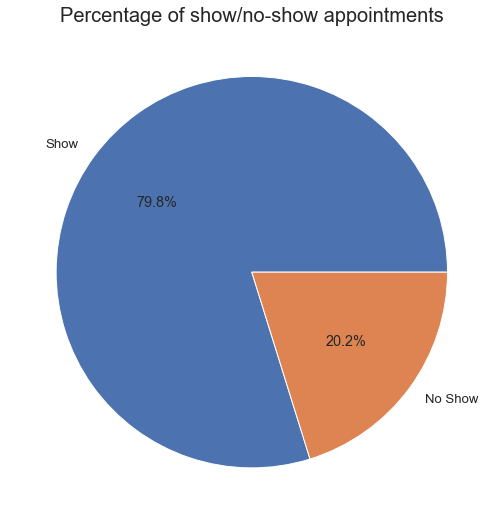

In [131]:
plt.pie(df.No_show.value_counts(),labels=['Show','No Show'],autopct='%.1f%%')
plt.title("Percentage of show/no-show appointments",fontsize=20);

In [38]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

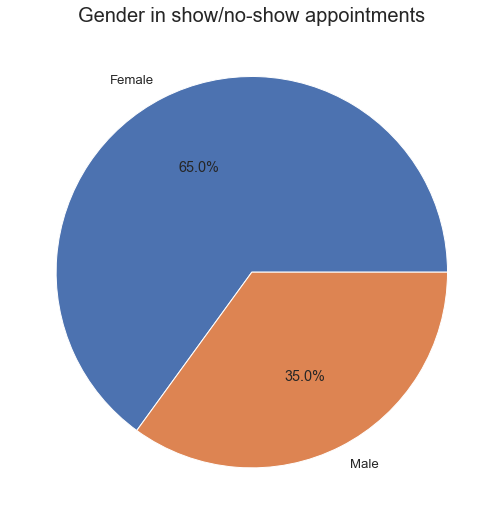

In [129]:
plt.pie(df.Gender.value_counts(),labels=['Female','Male'],autopct='%.1f%%')
plt.title("Gender in show/no-show appointments",fontsize=20);

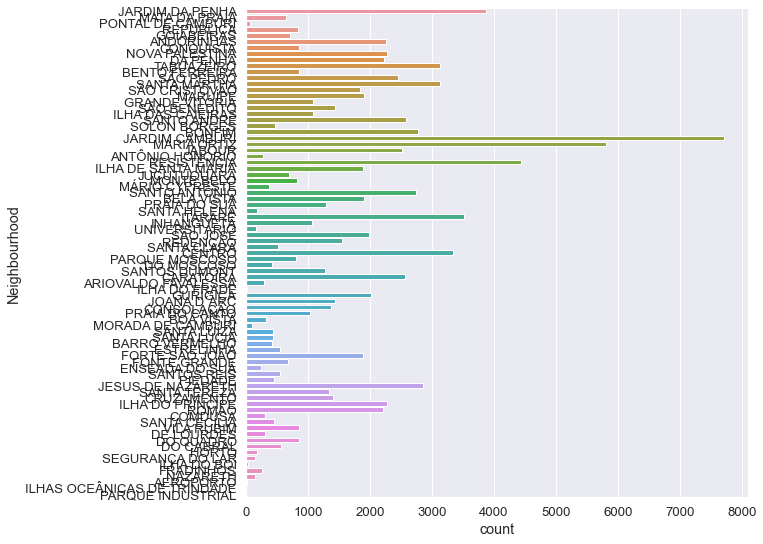

In [76]:
sns.countplot(y='Neighbourhood',data =df);

<font color = 'red'>there are too many Neighbourhoods to just plot normally</font>

In [70]:
df.Neighbourhood.nunique()

81

<font color = 'blue'> There are 81 different Neighbourhoods. so lets plot only the top 10</font>

In [111]:
top_10_Neighbourhood = df.Neighbourhood.value_counts()
top_10_Neighbourhood_labels = list(top_10_Neighbourhood[:10].keys())
top_10_Neighbourhood_labels.append("OTHERS")
top_10_Neighbourhood_values = list(top_10_Neighbourhood[:10].values)
top_10_Neighbourhood_values.append(top_10_Neighbourhood[10:].sum())

In [126]:
print(top_10_Neighbourhood_labels)

['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM', 'OTHERS']


In [127]:
print(top_10_Neighbourhood_values)

[7717, 5805, 4431, 3877, 3514, 3334, 3132, 3131, 2853, 2773, 69960]


In [115]:
sum(top_10_Neighbourhood_values)

110527

In [117]:
df.Neighbourhood.count()

110527

Text(0.5, 1.0, 'Top 10 Neighbourhoods')

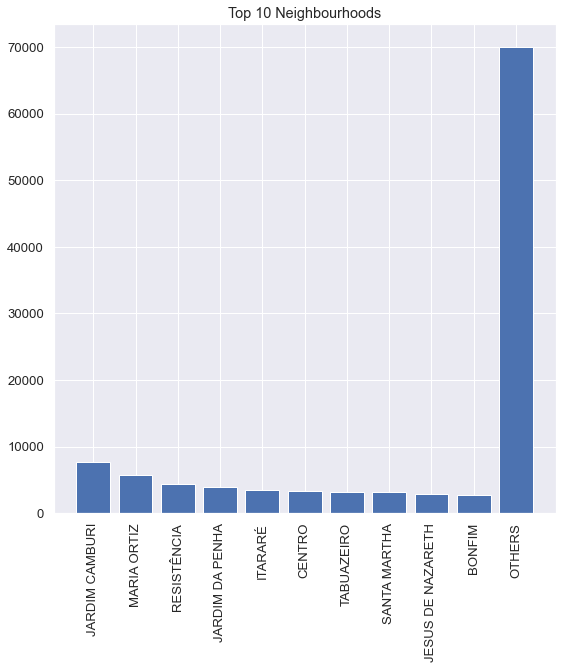

In [128]:
plt.bar(top_10_Neighbourhood_labels,top_10_Neighbourhood_values)
plt.xticks(rotation = 90);
plt.title("Top 10 Neighbourhoods")

In [132]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

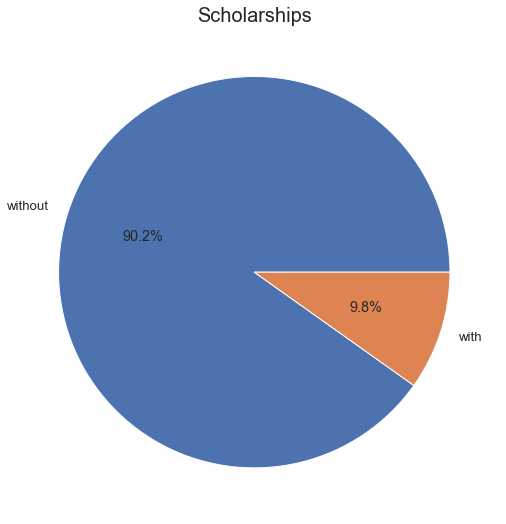

In [134]:
plt.pie(df.Scholarship.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Scholarships",fontsize=20);

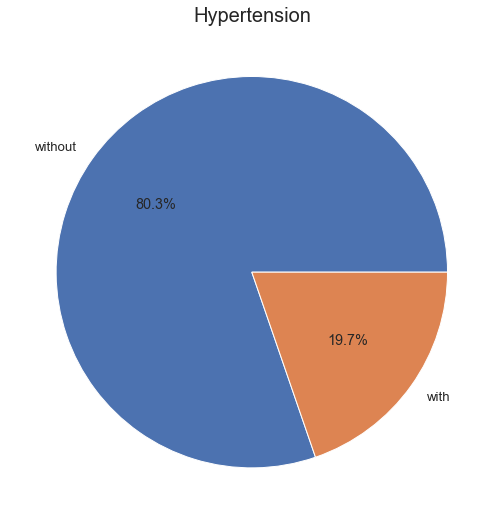

In [136]:
plt.pie(df.Hypertension.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Hypertension",fontsize=20);

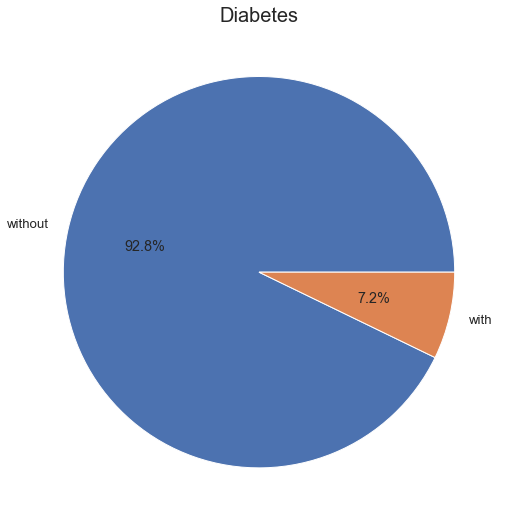

In [137]:
plt.pie(df.Diabetes.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Diabetes",fontsize=20);

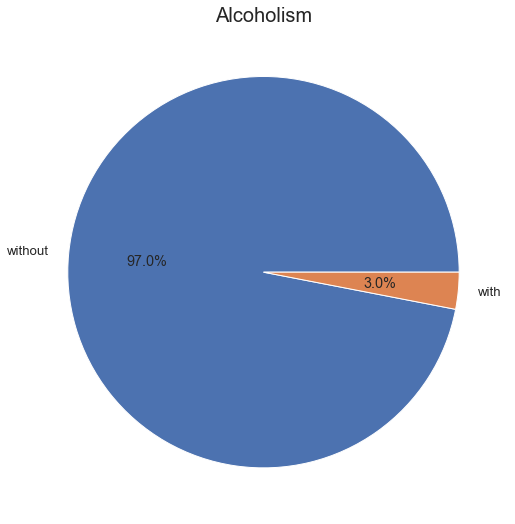

In [138]:
plt.pie(df.Alcoholism.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Alcoholism",fontsize=20);

In [143]:
handicapped = df.Handicapped.value_counts()
normal = handicapped.values[0]
non_normal = handicapped.values[1:].sum()

In [149]:
[normal,non_normal] #test

[108286, 2241]

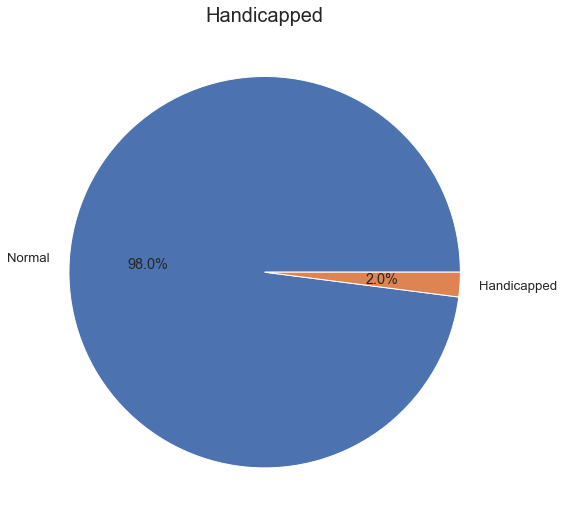

In [144]:
plt.pie([normal,non_normal],labels=['Normal','Handicapped'],autopct='%.1f%%')
plt.title("Handicapped",fontsize=20);

<font color = 'blue'> For the Column 'Handicapped', only 2% of data is handicapped, and they're split up into 4 different levels</font>

In [145]:
handicap_level_lables = ['Level 1','Level 2','Level 3','Level 4']
handicap_level_values = list(handicapped.values[1:])

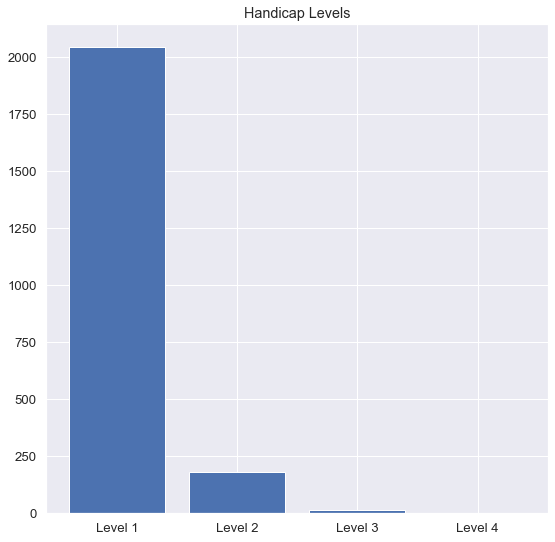

In [153]:
plt.bar(handicap_level_lables,handicap_level_values)
plt.title("Handicap Levels");

<font color = 'blue'> the majority of handicapped patients are of type 'level 1'</font>

In [156]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

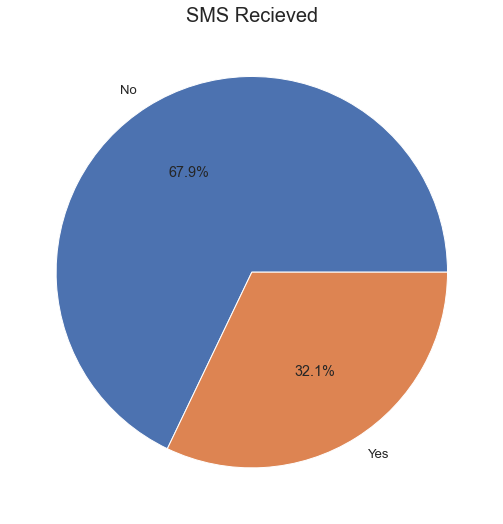

In [155]:
plt.pie(df.SMS_received.value_counts(),labels=['No','Yes'],autopct='%.1f%%')
plt.title("SMS Recieved",fontsize=20);

<font color = 'green'>Observations:</font>
<ul>
    <li>Showing up:	79% Show, 21% No Show
    <li>Gender:	65% Female, 35% Male
    <li>Neighbourhood: 81 different Neighbourhoods, Data almost evenly distributed. Hinting that this Data might be from a large clinc where people come from different Neighbourhoods instead of a local clinic that only has patients from nearby areas
    <li>Scholarships: around 10% have Scholarships
    <li>Hypertension: around 20% have Hypertension
    <li>Diabetesaround 7% are diabetic 
    <li>Alcoholism: 3% of the data
    <li>Handicapped: only 2% of data is handicapped, and they're split up into 4 different levels and the majority of handicapped patients are of type 'level 1'
    <li>SMS: around 32% recieved SMS
</ul>

### Q2: 2.which property matters the most when it comes to showing/not-showing up to appoinments ?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [158]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

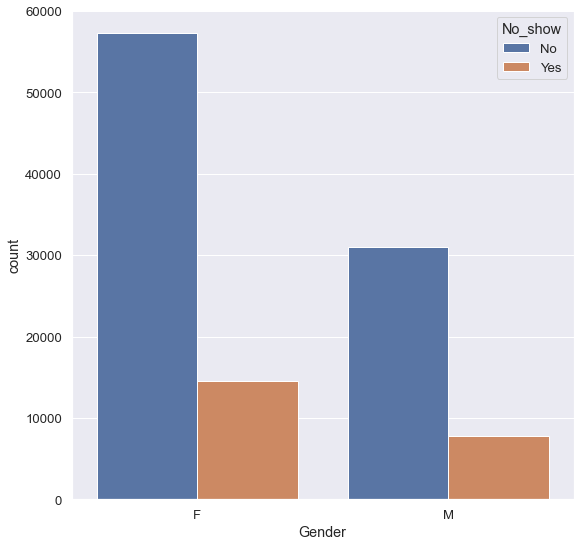

In [163]:
sns.countplot(x='Gender',hue ='No_show',data=df);

<font color = 'brown'>Nothing to conclude..</font>

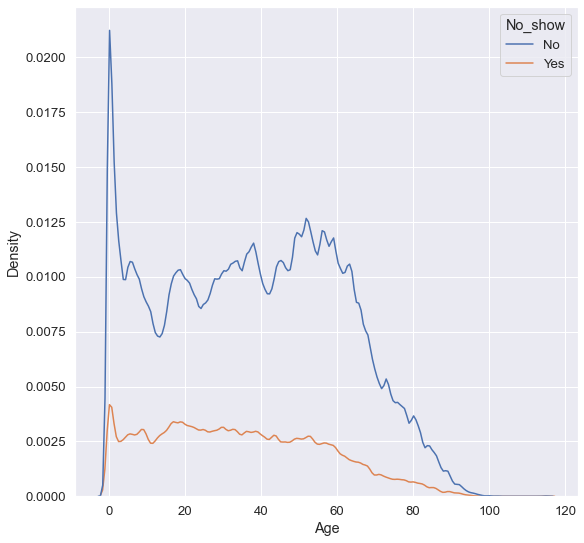

In [174]:
sns.kdeplot(x='Age',hue ='No_show',data=df,bw_adjust=0.25);

<font color = 'blue'> Nothing to conclude. However, a large amount of the data has an empty age column (=0)</font> 

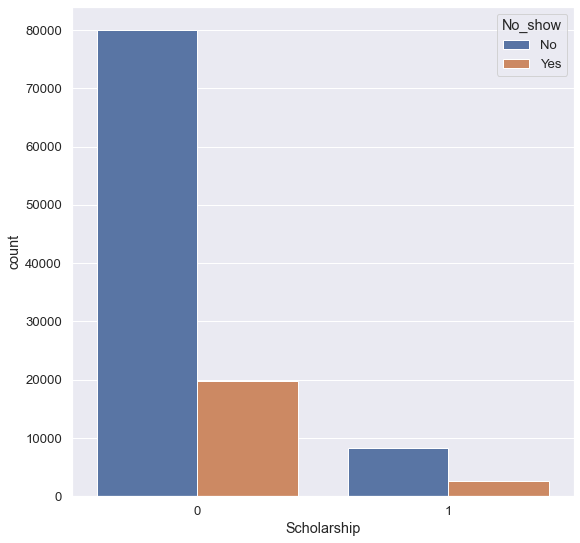

In [175]:
sns.countplot(x='Scholarship',hue ='No_show',data=df);

<font color = 'blue'> a lot patients that don't have a Schlarship tend to not show</font>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!